In [1]:
from rljax.algorithm import DQN
from rljax.trainer import Trainer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from micro_price_trading.config import TWENTY_SECOND_DAY
from micro_price_trading import Preprocess, OptimalExecutionEnvironment

In [2]:
raw = Preprocess('TBT_TBF_data.csv', res_bin=6)
data = raw.process()

In [3]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0

env = OptimalExecutionEnvironment(
    data,
    risk_weights=(2, 1),
    trade_penalty=10,
    max_purchase=4,
    steps=TWENTY_SECOND_DAY,
    end_units_risk=TWENTY_SECOND_DAY,  # Ideally, this should be `TWENTY_SECOND_DAY//5*2`
    seed=SEED
)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-5,  # Have been messing around with this but doesn't seem to make a big difference
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2500,
    seed=SEED,
)
trainer.train()

Num steps: 2500     Return: -93136.8   Time: 0:00:38
Num steps: 5000     Return: -92911.6   Time: 0:01:15
Num steps: 7500     Return: -92952.7   Time: 0:01:54
Num steps: 10000    Return: -93194.8   Time: 0:02:32


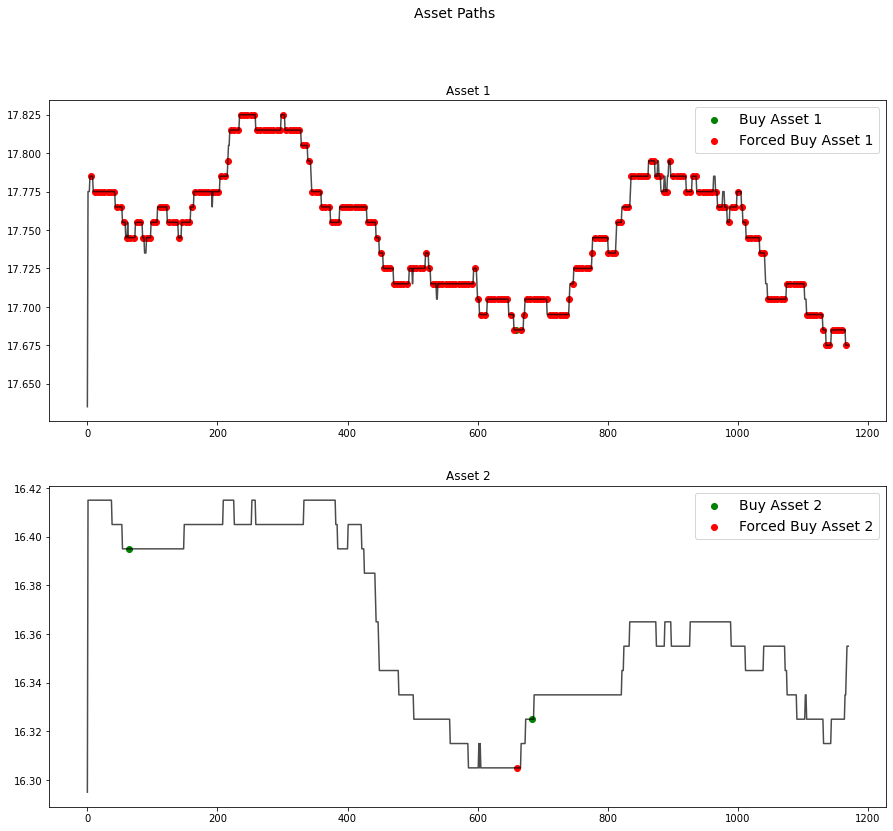

In [4]:
env_test.plot('asset_paths')

In [5]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
df = env_test.portfolios_to_df()
df

,time,cash,shares,prices,total_risk,res_imbalance_state,trade,penalty_trade,trade_asset,trade_shares,trade_risk,trade_price,trade_cost,trade_penalty,risk,next_risk_target,distance_to_next_risk_target,rewards,observations,raw_action,action
0,0,0.000,"(0, 0)","(17.63499999999997, 16.29499999999998)",0.0,302,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,NaN,NaN,4.0,0.0
1,1,0.000,"(0, 0)","(17.775, 16.415)",0.0,111,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[13.0, 3, 5]",4.0,0.0
2,2,0.000,"(0, 0)","(17.775, 16.415)",0.0,111,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[13.0, 2, 5]",4.0,0.0
3,3,0.000,"(0, 0)","(17.775, 16.415)",0.0,121,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[16.0, 1, 5]",4.0,0.0
4,4,0.000,"(0, 0)","(17.785, 16.415)",0.0,121,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,5.0,5.0,"(0, actual)","[16.0, 0, 5]",4.0,0.0
5,5,0.000,"(0, 0)","(17.785, 16.415)",0.0,121,None,None,NaN,NaN,NaN,NaN,NaN,None,5.0,5.0,5.0,"(0, actual)","[16.0, 4, 5]",4.0,0.0
6,6,-533.550,"(3.0, 0)","(17.785, 16.415)",6.0,201,None,"Trade(asset=1, shares=3.0, risk=6.0, price=17....",NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(-480.6150000000001, under risk penalty)","[19.0, 3, 10]",4.0,0.0
7,7,-533.550,"(3.0, 0)","(17.785, 16.415)",6.0,201,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(0, actual)","[19.0, 2, 4.0]",4.0,0.0
8,8,-533.550,"(3.0, 0)","(17.785, 16.415)",6.0,201,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(0, actual)","[19.0, 1, 4.0]",4.0,0.0
9,9,-533.550,"(3.0, 0)","(17.775, 16.415)",6.0,201,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,10.0,4.0,"(0, actual)","[19.0, 0, 4.0]",4.0,0.0


In [6]:
env_test.plot('extensive_risk_history')

TypeError: bad operand type for unary -: 'Portfolio'

In [ ]:
s = 0
for i in df['rewards'].fillna(0):
    if i:
        s += i[0]
s

#### Raw actions input by DQN before they are zero centered

In [7]:
env_test._raw_actions[-1]

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


#### Rewards along with a flag for the type of reward

In [8]:
env_test._rewards[-1]

[(0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-480.6150000000001, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-319.93, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-479.925, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-319.95, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-479.925, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-319.95, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-479.925, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-319.95, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-479.62499999999983, 'under risk penalty'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (0, 'actual'),
 (-319.77, '

#### Raw observations seen by DQN

In [9]:
env_test._observations[-1]

[[13.0, 3, 5],
 [13.0, 2, 5],
 [16.0, 1, 5],
 [16.0, 0, 5],
 [16.0, 4, 5],
 [19.0, 3, 10],
 [19.0, 2, 4.0],
 [19.0, 1, 4.0],
 [19.0, 0, 4.0],
 [19.0, 4, 4.0],
 [19.0, 3, 9.0],
 [19.0, 2, 5.0],
 [19.0, 1, 5.0],
 [19.0, 0, 5.0],
 [19.0, 4, 5.0],
 [19.0, 3, 10.0],
 [19.0, 2, 4.0],
 [13.0, 1, 4.0],
 [13.0, 0, 4.0],
 [13.0, 4, 4.0],
 [13.0, 3, 9.0],
 [13.0, 2, 5.0],
 [16.0, 1, 5.0],
 [12.0, 0, 5.0],
 [12.0, 4, 5.0],
 [15.0, 3, 10.0],
 [15.0, 2, 4.0],
 [12.0, 1, 4.0],
 [12.0, 0, 4.0],
 [9.0, 4, 4.0],
 [9.0, 3, 9.0],
 [9.0, 2, 5.0],
 [9.0, 1, 5.0],
 [9.0, 0, 5.0],
 [9.0, 4, 5.0],
 [9.0, 3, 10.0],
 [9.0, 2, 4.0],
 [0.0, 1, 4.0],
 [19.0, 0, 4.0],
 [19.0, 4, 4.0],
 [19.0, 3, 9.0],
 [19.0, 2, 5.0],
 [18.0, 1, 5.0],
 [19.0, 0, 5.0],
 [19.0, 4, 5.0],
 [19.0, 3, 10.0],
 [19.0, 2, 4.0],
 [13.0, 1, 4.0],
 [10.0, 0, 4.0],
 [16.0, 4, 4.0],
 [10.0, 3, 9.0],
 [9.0, 2, 5.0],
 [12.0, 1, 5.0],
 [12.0, 0, 5.0],
 [9.0, 4, 5.0],
 [9.0, 3, 10.0],
 [18.0, 2, 4.0],
 [21.0, 1, 4.0],
 [21.0, 0, 4.0],
 [18.0, 4, 4.0]

### Raw format for accessing the portfolio history
Should ideally be gotten by `env_test.portfolio_history`

## FOR SOME REASON, THE LENGTH OF THIS IS NOWHERE NEAR WHAT IT SHOULD BE FOR THE BASE TRAINING ENV. I AM GETTING AROUND 17 ENTRIES FOR IT BUT THE ENV_TEST SEEMS TO BE CORRECT

In [10]:
env_test._portfolios[3][-1]

Portfolio(time=1170, cash=-102642.06999999999, shares=(581.0, 4), prices=(17.554999999999964, 16.435000000000002), total_risk=1166.0, res_imbalance_state='200', trade=None, penalty_trade=None)

In [11]:
env_test.end_units_risk

1170

In [12]:
env_test._period_risk.get(5, env_test.end_units_risk)

1165

In [13]:
env_test.end_units_risk - env_test.current_portfolio.total_risk

5.0

In [14]:
env_test.prices_at_start

array([17.675, 16.335])

In [15]:
# print(env_test.step(2))
# env_test._portfolios[-1][-1]

### Not sure this plot is fully correct, when the shares hit this line perfectly, they fail to hit the risk plot perfectly. This also happens in reverse

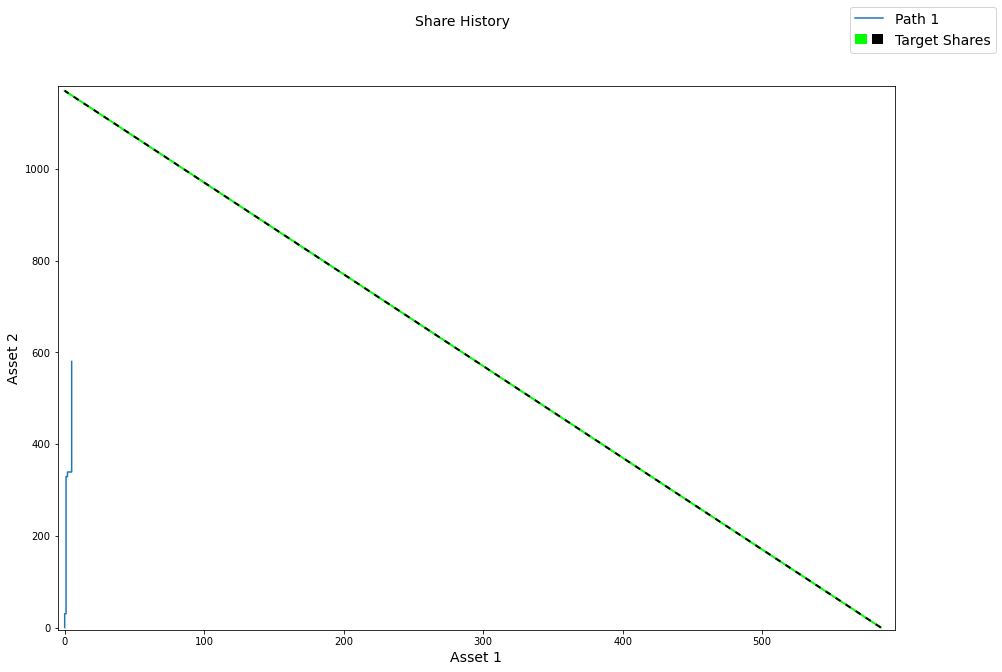

In [16]:
env_test.plot()

### Case and point, shares hit well but risk doesn't

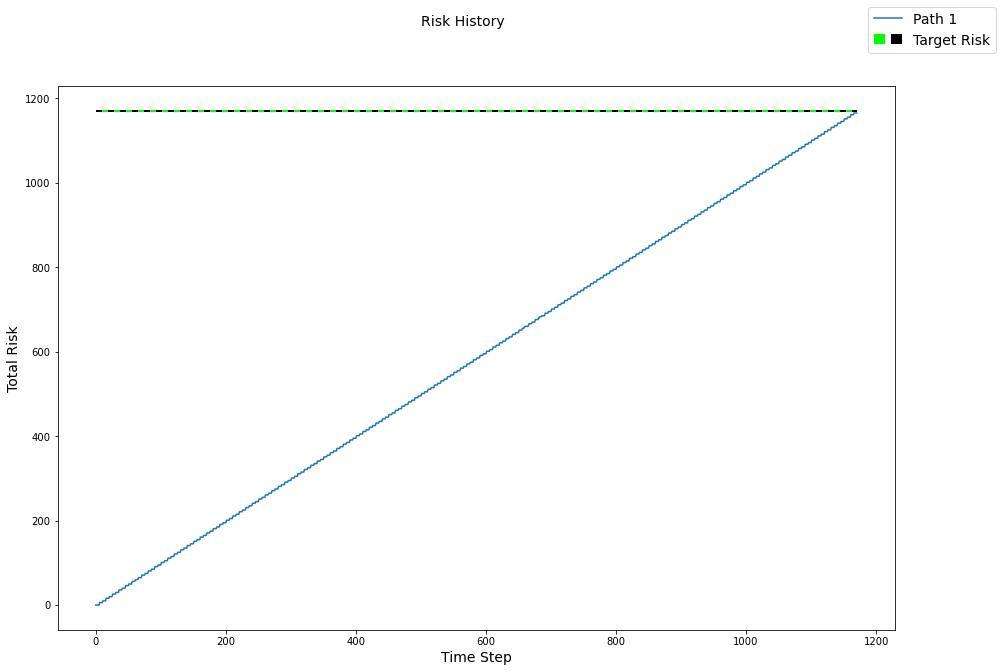

In [17]:
env_test.plot('risk_history')

### Count number of chosen trades
Can use `len([p.time for p in env_test.portfolio_history[-1] if (p.trade or p.penalty_trade)])` for all trades or `len([p.time for p in env_test.portfolio_history[-1] if (p.penalty_trade)])` for the penalty trades

In [18]:
len([p.time for p in env_test.portfolio_history[-1] if (p.trade)])

3

### Changes the `env_test._period_risk` dictionary to have the amount of risk we should have bought instead of the amount of risk remaining

In [19]:
dict(zip(env_test._period_risk.keys(), env_test.end_units_risk-np.array(list(env_test._period_risk.values()))))

{5: 5,
 10: 10,
 15: 15,
 20: 20,
 25: 25,
 30: 30,
 35: 35,
 40: 40,
 45: 45,
 50: 50,
 55: 55,
 60: 60,
 65: 65,
 70: 70,
 75: 75,
 80: 80,
 85: 85,
 90: 90,
 95: 95,
 100: 100,
 105: 105,
 110: 110,
 115: 115,
 120: 120,
 125: 125,
 130: 130,
 135: 135,
 140: 140,
 145: 145,
 150: 150,
 155: 155,
 160: 160,
 165: 165,
 170: 170,
 175: 175,
 180: 180,
 185: 185,
 190: 190,
 195: 195,
 200: 200,
 205: 205,
 210: 210,
 215: 215,
 220: 220,
 225: 225,
 230: 230,
 235: 235,
 240: 240,
 245: 245,
 250: 250,
 255: 255,
 260: 260,
 265: 265,
 270: 270,
 275: 275,
 280: 280,
 285: 285,
 290: 290,
 295: 295,
 300: 300,
 305: 305,
 310: 310,
 315: 315,
 320: 320,
 325: 325,
 330: 330,
 335: 335,
 340: 340,
 345: 345,
 350: 350,
 355: 355,
 360: 360,
 365: 365,
 370: 370,
 375: 375,
 380: 380,
 385: 385,
 390: 390,
 395: 395,
 400: 400,
 405: 405,
 410: 410,
 415: 415,
 420: 420,
 425: 425,
 430: 430,
 435: 435,
 440: 440,
 445: 445,
 450: 450,
 455: 455,
 460: 460,
 465: 465,
 470: 470,
 475: 

In [20]:
list(zip(env_test._rewards[-1], env_test.portfolio_history[-1]))

[((0, 'actual'),
  Portfolio(time=0, cash=0, shares=(0, 0), prices=(17.63499999999997, 16.29499999999998), total_risk=0, res_imbalance_state='302', trade=None, penalty_trade=None)),
 ((0, 'actual'),
  Portfolio(time=1, cash=0, shares=(0, 0), prices=(17.775, 16.415), total_risk=0, res_imbalance_state='111', trade=None, penalty_trade=None)),
 ((0, 'actual'),
  Portfolio(time=2, cash=0, shares=(0, 0), prices=(17.775, 16.415), total_risk=0, res_imbalance_state='111', trade=None, penalty_trade=None)),
 ((0, 'actual'),
  Portfolio(time=3, cash=0, shares=(0, 0), prices=(17.775, 16.415), total_risk=0, res_imbalance_state='121', trade=None, penalty_trade=None)),
 ((0, 'actual'),
  Portfolio(time=4, cash=0, shares=(0, 0), prices=(17.785, 16.415), total_risk=0, res_imbalance_state='121', trade=None, penalty_trade=None)),
 ((-480.6150000000001, 'under risk penalty'),
  Portfolio(time=5, cash=0, shares=(0, 0), prices=(17.785, 16.415), total_risk=0, res_imbalance_state='121', trade=None, penalty_tra

In [21]:
env_test._observations[-1]

[[13.0, 3, 5],
 [13.0, 2, 5],
 [16.0, 1, 5],
 [16.0, 0, 5],
 [16.0, 4, 5],
 [19.0, 3, 10],
 [19.0, 2, 4.0],
 [19.0, 1, 4.0],
 [19.0, 0, 4.0],
 [19.0, 4, 4.0],
 [19.0, 3, 9.0],
 [19.0, 2, 5.0],
 [19.0, 1, 5.0],
 [19.0, 0, 5.0],
 [19.0, 4, 5.0],
 [19.0, 3, 10.0],
 [19.0, 2, 4.0],
 [13.0, 1, 4.0],
 [13.0, 0, 4.0],
 [13.0, 4, 4.0],
 [13.0, 3, 9.0],
 [13.0, 2, 5.0],
 [16.0, 1, 5.0],
 [12.0, 0, 5.0],
 [12.0, 4, 5.0],
 [15.0, 3, 10.0],
 [15.0, 2, 4.0],
 [12.0, 1, 4.0],
 [12.0, 0, 4.0],
 [9.0, 4, 4.0],
 [9.0, 3, 9.0],
 [9.0, 2, 5.0],
 [9.0, 1, 5.0],
 [9.0, 0, 5.0],
 [9.0, 4, 5.0],
 [9.0, 3, 10.0],
 [9.0, 2, 4.0],
 [0.0, 1, 4.0],
 [19.0, 0, 4.0],
 [19.0, 4, 4.0],
 [19.0, 3, 9.0],
 [19.0, 2, 5.0],
 [18.0, 1, 5.0],
 [19.0, 0, 5.0],
 [19.0, 4, 5.0],
 [19.0, 3, 10.0],
 [19.0, 2, 4.0],
 [13.0, 1, 4.0],
 [10.0, 0, 4.0],
 [16.0, 4, 4.0],
 [10.0, 3, 9.0],
 [9.0, 2, 5.0],
 [12.0, 1, 5.0],
 [12.0, 0, 5.0],
 [9.0, 4, 5.0],
 [9.0, 3, 10.0],
 [18.0, 2, 4.0],
 [21.0, 1, 4.0],
 [21.0, 0, 4.0],
 [18.0, 4, 4.0]

In [22]:
plt.plot(np.cumsum(env_test._rewards[-1]))

TypeError: cannot perform accumulate with flexible type

In [ ]:
import numpy as np

In [ ]:
env_test.risk_history[-1]

In [ ]:
set(np.gradient(env_test.risk_history[-1]))

In [ ]:
env_test.portfolio_history

In [ ]:
np.argwhere(env_test.risk_history[-1] > env_test.end_units_risk)